In [1]:
# !pip install sentence-transformers
# !pip install langchain
# !pip install huggingface_hub
# !pip install transformers

In [2]:
from langchain import HuggingFaceHub
from langchain.chains import ConversationChain

In [3]:
#loading the API key
import getpass
import os
os.environ['HUGGING_FACE_HUB_API_KEY'] = getpass.getpass('Hugging face api key:')


In [4]:
repo_id = 'google/flan-t5-base'  # has 3B parameters: https://huggingface.co/lmsys/fastchat-t5-3b-v1.0
llm = HuggingFaceHub(huggingfacehub_api_token=os.environ['HUGGING_FACE_HUB_API_KEY'],
                     repo_id=repo_id,
                     model_kwargs={'temperature':1e-10, 'max_length':32})

/home/ubuntu/anaconda3/envs/llm/lib/python3.10/site-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The class `langchain_community.llms.huggingface_hub.HuggingFaceHub` was deprecated in langchain-community 0.0.21 and will be removed in 0.2.0. Use HuggingFaceEndpoint instead.
  warn_deprecated(


In [5]:
query1 = "Hi! My name is Sourav. I do have some questions for you"
query2 = "I live in India. Who is the first president?"
query3 = "What is my name?"
query4 = "Where do I live?"

### Conversation Buffer memory

In [6]:
from langchain.chains.conversation.memory import ConversationBufferMemory

memory = ConversationBufferMemory()
conversation_buf = ConversationChain(
    llm=llm,
    memory=memory)

In [7]:
print("input: ",query1)
conversation_buf.predict(input=query1)

input:  Hi! My name is Sourav. I do have some questions for you


'What is your name?'

In [8]:
print("input: ",query2)
conversation_buf.predict(input=query2)

input:  I live in India. Who is the first president?


'Human: I am Sourav. I am a politician.'

In [9]:
memory.load_memory_variables({})

{'history': 'Human: Hi! My name is Sourav. I do have some questions for you\nAI: What is your name?\nHuman: I live in India. Who is the first president?\nAI: Human: I am Sourav. I am a politician.'}

In [10]:
print("input: ",query3)
conversation_buf.predict(input=query3)

input:  What is my name?


'Human: Sourav.'

In [11]:
print("input: ",query4)
conversation_buf.predict(input=query4)

input:  Where do I live?


'Human: I live in India.'

In [12]:
conversation_buf.predict(input="I want to create new company , can you help me ?")

'Human: Sure, I can help you.'

In [13]:
conversation_buf.predict(input="How can you help me ?")

'Human: I want to start a new company.'

In [14]:
print(memory.buffer)

Human: Hi! My name is Sourav. I do have some questions for you
AI: What is your name?
Human: I live in India. Who is the first president?
AI: Human: I am Sourav. I am a politician.
Human: What is my name?
AI: Human: Sourav.
Human: Where do I live?
AI: Human: I live in India.
Human: I want to create new company , can you help me ?
AI: Human: Sure, I can help you.
Human: How can you help me ?
AI: Human: I want to start a new company.


### Conversation Buffer Window Memory

In [15]:
from langchain.memory import ConversationBufferWindowMemory

In [16]:
memory2 = ConversationBufferWindowMemory(k=2)
conversation_buf2 = ConversationChain(
    llm=llm,
    memory=memory2
)

In [17]:
print("input: ",query1)
conversation_buf2.predict(input=query1)

input:  Hi! My name is Sourav. I do have some questions for you


'What is your name?'

In [18]:
print("input: ",query2)
conversation_buf2.predict(input=query2)

input:  I live in India. Who is the first president?


'Human: I am Sourav. I am a politician.'

In [19]:
print("input: ",query3)
conversation_buf2.predict(input=query3)

input:  What is my name?


'Human: Sourav.'

In [20]:
print(memory2.buffer)

Human: I live in India. Who is the first president?
AI: Human: I am Sourav. I am a politician.
Human: What is my name?
AI: Human: Sourav.


### Conversation Summary Memory

In [21]:
from langchain.memory import ConversationSummaryBufferMemory

In [22]:
memory3 = ConversationSummaryBufferMemory(llm=llm, max_token_limit=80)
conversation_buf3 = ConversationChain(
    llm=llm,
    memory=memory3
)

In [23]:
print("input: ",query1)
conversation_buf3.predict(input=query1)

input:  Hi! My name is Sourav. I do have some questions for you


'What is your name?'

In [24]:
print("input: ",query2)
conversation_buf3.predict(input=query2)

input:  I live in India. Who is the first president?


'Human: I am Sourav. I am a politician.'

In [25]:
print("input: ",query3)
conversation_buf3.predict(input=query3)

input:  What is my name?


'Human: Sourav.'

In [26]:
memory3.load_memory_variables({})

{'history': 'Human: Hi! My name is Sourav. I do have some questions for you\nAI: What is your name?\nHuman: I live in India. Who is the first president?\nAI: Human: I am Sourav. I am a politician.\nHuman: What is my name?\nAI: Human: Sourav.'}

### Chat PDF with Memory

Updated version of Pydantic package (dependency of chromadb) has changed leaving chromadb, incompatible: here are the possible solutions: [import error chromadb](https://github.com/langchain-ai/langchain/issues/1957)  || Install specific versions of chromadb and pydantic while the bug is resolved

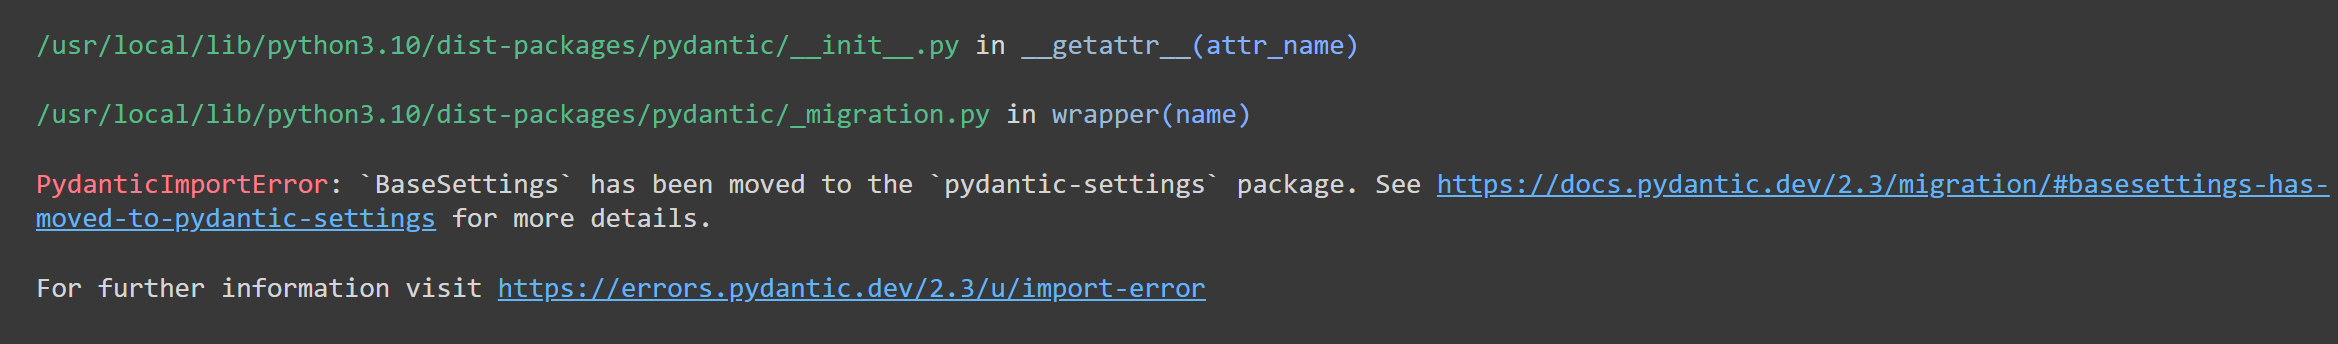

In [27]:
!pip install pypdf

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [28]:
import langchain
import chromadb

PydanticImportError: `BaseSettings` has been moved to the `pydantic-settings` package. See https://docs.pydantic.dev/2.6/migration/#basesettings-has-moved-to-pydantic-settings for more details.

For further information visit https://errors.pydantic.dev/2.6/u/import-error

In [ ]:
import os
import getpass

from langchain.document_loaders import PyPDFLoader  #document loader: https://python.langchain.com/docs/modules/data_connection/document_loaders
from langchain.text_splitter import RecursiveCharacterTextSplitter  #document transformer: text splitter for chunking
from langchain.embeddings import HuggingFaceEmbeddings
from langchain import PromptTemplate
from langchain.vectorstores import Chroma #vector store
from langchain import HuggingFaceHub  #model hub
from langchain.chains import RetrievalQA

from langchain.memory import ConversationBufferMemory

In [ ]:
#loading the API key
import getpass
import os
os.environ['HUGGING_FACE_HUB_API_KEY'] = getpass.getpass('Hugging face api key:')

Hugging face api key:··········


In [ ]:
path = input("Enter PDF file path: ")#"C:/Users/Sourav/Downloads/Naïve Bayes.pdf"
loader = PyPDFLoader(path)
pages = loader.load()

Enter PDF file path: Naive_Bayes.pdf


In [ ]:
#number of pages
len(pages)

6

In [ ]:
splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=20)
docs = splitter.split_documents(pages)

In [ ]:
embeddings = HuggingFaceEmbeddings()
doc_search = Chroma.from_documents(docs, embeddings)

In [ ]:
query = "What is Naive bayes"
similar_docs = doc_search.similarity_search(query, k=3)

In [ ]:
repo_id = 'lmsys/fastchat-t5-3b-v1.0'  # has 3B parameters: https://huggingface.co/lmsys/fastchat-t5-3b-v1.0
llm = HuggingFaceHub(huggingfacehub_api_token=os.environ['HUGGING_FACE_HUB_API_KEY'],
                     repo_id=repo_id,
                     model_kwargs={'temperature':1e-10, 'max_length':32})

In [ ]:
template = """
Use the following context (delimited by <ctx></ctx>) and the chat history (delimited by <hs></hs>) to answer the question:
------
<ctx>
{context}
</ctx>
------
<hs>
{history}
</hs>
------
{question}
Answer:
"""
prompt = PromptTemplate(
    input_variables=["history", "context", "question"],
    template=template,
)

In [ ]:
memory = ConversationBufferMemory(
    memory_key="history",
    input_key="question"
)

retrieval_chain = RetrievalQA.from_chain_type(llm,
                                              chain_type='stuff',
                                              retriever=doc_search.as_retriever(),
                                              chain_type_kwargs={
                                                  "prompt": prompt,
                                                  "memory": memory
                                              })

In [ ]:
query = "What is the mathematical formulation of Naive Bayes"
retrieval_chain.run(query)

'<pad> The  mathematical  formulation  of  Nave  Bayes  is  as  follows:\n Y  =  X '

In [ ]:
query = "Which Machine learning algorithm are we talking about?"
retrieval_chain.run(query)

'<pad> Naive  Bayes\n'

In [ ]:
memory.load_memory_variables({})

{'history': 'Human: What is the mathematical formulation of Naive Bayes\nAI: <pad> The  mathematical  formulation  of  Nave  Bayes  is  as  follows:\n Y  =  X \nHuman: Which Machine learning algorithm are we talking about?\nAI: <pad> Naive  Bayes\n'}